# LSTM Example
This notebook will go through an example of processing SMS text messages and determining if they are spam or not spam.  

We will do quite a bit of pre-processing, which I will briefly cover.  Further information in this topic can be found in subsequent courses or in the associated reference links.  

The main purpose of this notebook is to show how to use LSTMs on a deep neural network with text data.

### Dataset
The dataset can be found on this website: https://archive.ics.uci.edu/dataset/228/sms+spam+collection.  It consists of 425 spam messages and 3375 non-spam ("ham") messages.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

# Workshop Functions
import sys
sys.path.append('..')
from WKDSS320_functions import * 

np.random.seed(1)

In [2]:
rawInput = pd.read_csv('SMSSpamCollection', sep='\t', names=['label','message'])
print(rawInput.loc[5,'label'], '\n', rawInput.loc[5,'message'])

spam 
 FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


In [3]:
df = pd.read_csv('SMSSpamCollection_clean.csv')

In [4]:
df.loc[5,'message']

"['FreeMsg', 'Hey', 'darling', '3', 'weeks', 'word', 'back', 'Id', 'like', 'fun', 'still', 'Tb', 'ok', 'XxX', 'std', 'chgs', 'send', '£150', 'rcv']"

In [5]:
#most texts short, but this one was really long
df.loc[1085,'message']

"['love', 'start', 'attractioni', 'feel', 'need', 'every', 'time', 'around', 'meshe', 'first', 'thing', 'comes', 'thoughtsI', 'would', 'start', 'day', 'end', 'hershe', 'every', 'time', 'dreamlove', 'every', 'breath', 'namemy', 'life', 'happen', 'around', 'hermy', 'life', 'named', 'herI', 'would', 'cry', 'herwill', 'give', 'happiness', 'take', 'sorrowsI', 'ready', 'fight', 'anyone', 'herI', 'love', 'craziest', 'things', 'herlove', 'dont', 'proove', 'anyone', 'girl', 'beautiful', 'lady', 'whole', 'planetI', 'always', 'singing', 'praises', 'herlove', 'start', 'making', 'chicken', 'curry', 'end', 'makiing', 'sambarlife', 'beautiful', 'thenwill', 'get', 'every', 'morning', 'thank', 'god', 'day', 'meI', 'would', 'like', 'say', 'lotwill', 'tell', 'later']"

In [6]:
df.head()

,Unnamed: 0,label,message,length
0,0,ham,"['Go', 'jurong', 'point', 'crazy', 'Available'...",111
1,1,ham,"['Ok', 'lar', 'Joking', 'wif', 'u', 'oni']",29
2,2,spam,"['Free', 'entry', '2', 'wkly', 'comp', 'win', ...",155
3,3,ham,"['U', 'dun', 'say', 'early', 'hor', 'U', 'c', ...",49
4,4,ham,"['Nah', 'dont', 'think', 'goes', 'usf', 'lives...",61


### Tokenize input words and use result in LSTM NN

Sources:

https://towardsdatascience.com/understanding-lstm-and-its-quick-implementation-in-keras-for-sentiment-analysis-af410fd85b47
and 
https://towardsdatascience.com/an-easy-tutorial-about-sentiment-analysis-with-deep-learning-and-keras-2bf52b9cba91

In [7]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

#max_words = 5000
#max_len = 100

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['message'])
sequences = tokenizer.texts_to_sequences(df['message'])
texts = pad_sequences(sequences, maxlen=100)
texts.shape

(5572, 100)

In [8]:
texts[5]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,  740,   59, 1484,  115,  490,  251,   36,
        273,   14,  286,   34, 1733,   10,  252,  931, 4277,   23,  343,
       2794])

In [9]:
mapping = {'ham':0, 'spam':1}
df.loc[:,'label'] = df.loc[:,'label'].map(mapping)

In [10]:
df.loc[1:5,'label']

1    0
2    1
3    0
4    0
5    1
Name: label, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(texts, df.loc[:,'label'].values, test_size=0.3, random_state=1)

In [12]:
X_train.shape

(3900, 100)

In [13]:
from keras.models import Sequential
from keras.layers import Embedding, Dense, LSTM

In [14]:
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=10, input_length=100)) #The embedding layer
model.add(LSTM(3,dropout=0.5)) # More LSTM layers lead to overfitting
model.add(Dense(1,activation='sigmoid'))

In [15]:
model.compile(optimizer='adam',loss='binary_crossentropy') 
model.fit(x = X_train, y = y_train, epochs=25,validation_data=(X_test, y_test))

Epoch 1/25
122/122 [==============================] - 7s 40ms/step - loss: 0.5293 - val_loss: 0.3459
Epoch 2/25
122/122 [==============================] - 4s 33ms/step - loss: 0.2762 - val_loss: 0.2358
Epoch 3/25
122/122 [==============================] - 5s 37ms/step - loss: 0.1933 - val_loss: 0.1797
Epoch 4/25
122/122 [==============================] - 5s 40ms/step - loss: 0.1492 - val_loss: 0.1406
Epoch 5/25
122/122 [==============================] - 4s 36ms/step - loss: 0.1196 - val_loss: 0.1183
Epoch 6/25
122/122 [==============================] - 6s 46ms/step - loss: 0.0999 - val_loss: 0.1037
Epoch 7/25
122/122 [==============================] - 5s 40ms/step - loss: 0.0833 - val_loss: 0.0946
Epoch 8/25
122/122 [==============================] - 4s 34ms/step - loss: 0.0707 - val_loss: 0.0841
Epoch 9/25
122/122 [==============================] - 5s 40ms/step - loss: 0.0578 - val_loss: 0.0798
Epoch 10/25
122/122 [==============================] - 5s 40ms/step - loss: 0.0509 - val_lo

<AxesSubplot:>

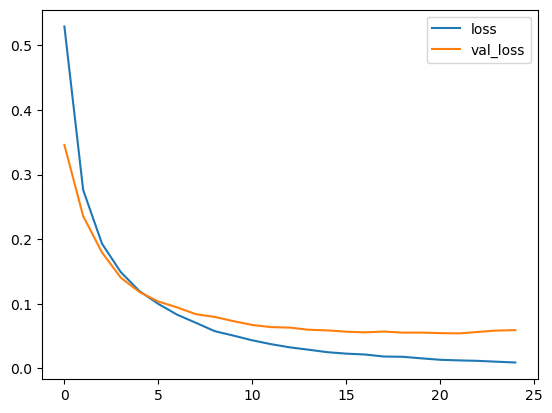

In [16]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [17]:
y_train.shape

(3900,)